# Adaptive binning

In [1]:
# Import the modules and set the matplotlib style
import hep_spt
hep_spt.set_style()
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np

Let's generate an adaptive binned histogram in 1 dimension. We will create three histograms. One will be the raw histogram (with equal-size bins). The second will have adaptive bins, and the second will be the same as the latter but considering some weights for the input sample.

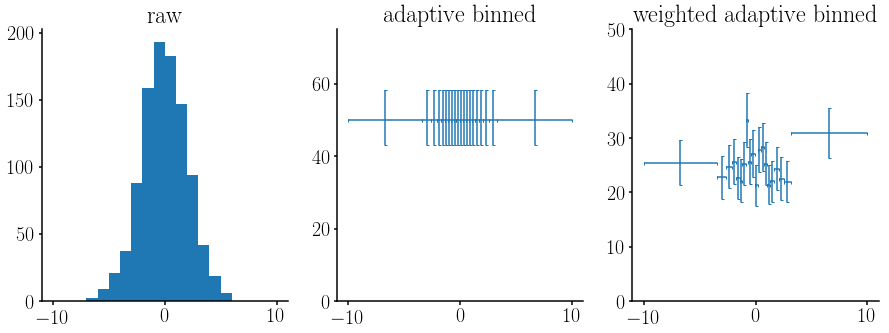

In [2]:
# Create a random sample
size = 1000
smp  = np.random.normal(0., 2, size)
wgts = np.random.uniform(0, 1, size)

figs, (root, al, ar) = plt.subplots(1, 3, figsize=(15, 5))

# Draw the normal distribution
bins = 20
rg   = (-10, 10)

root.hist(smp, bins, rg, label = 'raw')
root.set_title('raw')

# Draw both the non-weighted and the weighted adaptive binned histograms
for s, w, a, t in ((smp, None, al, 'adaptive binned'),
                   (smp, wgts, ar, 'weighted adaptive binned')):

    values, edges, ex, ey = hep_spt.adbin_hist1d(s, wgts=w, nbins=bins, rg=rg)
    centers = (edges[1:] + edges[:-1])/2.

    a.errorbar(centers, values, ey, ex, ls = 'None')
    a.set_ylim(0, 1.5*values.max())
    a.set_title(t)
    
plt.show()

Now let's take a look at 2-dimensional histograms. First we will define a function to help us to draw 2-dimensional adaptive binned histograms

In [3]:
def _draw_adbin_hist2d( ax, x, y, nbins, rg, wgts = None, **kwargs ):
    '''
    Helper function to plot points and overlaid an adaptive binned histogram.
    '''
    bins = hep_spt.adbin_hist2d(x, y, nbins, rg, wgts)

    d = np.array([x, y]).T

    recs, cons = hep_spt.adbin_hist2d_rectangles(bins, d, **kwargs)

    ax.plot(x, y, '.k', alpha=0.01)

    for r in recs:
        ax.add_patch(r)

    ax.set_xlim(*rg.T[0])
    ax.set_ylim(*rg.T[1])

    return recs, cons

Now, we will create a figure showing the evolution of the algorithm to create adaptive bins on a non-weighted sample. Next to it, we will plot the status for a step showing with text the sum of weights in each bin, and another histogram with the weighted case.

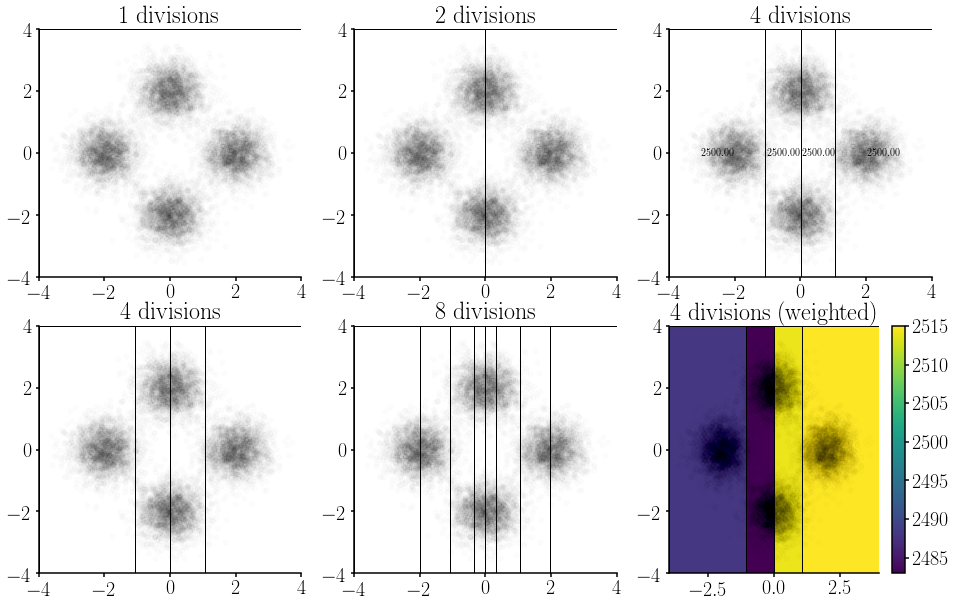

In [4]:
# Create a random sample
size = 2500

region = lambda c, s: np.random.normal(c, s, size)

x = np.concatenate([region(-2, 0.5), region(0, 0.5), region(0, 0.5), region(2, 0.5)])
y = np.concatenate([region(0, 0.5), region(-2, 0.5), region(2, 0.5), region(0, 0.5)])
w = np.random.uniform(0, 1, 4*size)
r = np.array([(-4, -4), (4, 4)])

# Create the main figure
fig = plt.figure(figsize = (16, 10))

# Create one plot for each step of the divisions
nx = ny = 2
for i in range(nx):
    for j in range(ny):

        a = fig.add_subplot(nx, ny + 1, i*(ny + 1) + j + 1)

        n = 2**(i*ny + j)

        _draw_adbin_hist2d(a, x, y, n, r, ec='k')

        a.set_title('{} divisions'.format(n))

# Create a histogram with the data displayed as text in the bins
a = fig.add_subplot(nx, ny + 1, (nx - 1)*(ny + 1))
a.set_title('{} divisions'.format(4))

recs, cons = _draw_adbin_hist2d(a, x, y, 4, r, ec='k', color=False)

txt = ['{:.2f}'.format(c) for c in cons]

hep_spt.text_in_rectangles(a, recs, txt, va='center', ha='center')

# Draw the weighted sample with the color bar
a = fig.add_subplot(nx, ny + 1, nx*(ny + 1))
a.set_title('{} divisions (weighted)'.format(4))

_, cons = _draw_adbin_hist2d(a, x, y, 4, r, w, ec='k')

norm = mpl.colors.Normalize(vmin=cons.min(), vmax=cons.max())

ca, kw = mpl.colorbar.make_axes(a)
mpl.colorbar.ColorbarBase(ca, norm=norm)
    
plt.show()